# 18.C21 Problem Set 2

Due Wednesday 2/18 at **midnight**.  Submit in PDF format.  For handwritten solutions, use a decent-quality scan/image (e.g. get a scanner app on your phone or use a tablet).  For computational results, submit a PDF printout of your Jupyter notebook showing your code and (clearly labeled) results.  Combine all your submissions into a single PDF file.

**TO GENERATE A PDF OF A JUPYTER NOTEBOOK:** In the Jupyter client (e.g. the [JupyterLab Desktop](https://github.com/jupyterlab/jupyterlab-desktop) app), in the File pull-down menu, select Save and Export Notebook As, and then select the HTML format (not PDF, which may require special software). Then open the downloaded HTML file with your favorite browser, and use the browser's Print function to generate the PDF file.

## Problem 1 (4+4+4+4 points)

See also [FNC book section 1.2](https://fncbook.com/conditioning/).  

**(a)** Compute the absolute and relative condition numbers of $f(x) = x^p$ for arbitrary real powers $p$.  Which one of them diverges for $p < 1$, and why?

**(b)** Suppose that $h(x) = f(g(x))$, for differentiable functions $f$ and $g$ mapping real $\mapsto$ real.  Show that the relative condition number $\kappa_r(h, x)$ of $h$ at $x$ is a product of the relative condition numbers of $f$ and $g$: 
$$
\kappa_r(h, x) = \kappa_r(f, g(x)) \kappa_r(g, x)
$$

**(c)** Find the relative condition number of $h(x) = \sqrt{x+1}$ (for $x \ge -1$).  Compare it to the result of the formula from (b) for $f(y) = \sqrt{y}$ and $g(x) = x + 1$.  Around where might you expect a 1% error in $x$ to lead to a large relative error in $h(x)$?  Where might a 1% error in $x$ lead to a much smaller relative error in $h(x)$?

**(d)** Compute and compare the relative condition numbers of $g(x) = \sqrt{x+1}$ (from the previous part), $f(y) = y - 1$, and $h(x) = f(g(x)) = \sqrt{x+1} - 1$.  How do these relate to your results from problem 2 of pset 1?

## Problem 2 (5+10+5 points)

(From the FNC book [exercise 9.3.6](https://fncbook.com/stability-1/).)

To interpolate functions defined on the entire real line, one can use the change of variables
$$
z = \phi(x) = \frac{2x}{1-x^2} \, ,
$$
which maps the interval $x \in (-1,1)$ in one-to-one fashion to $z$ on the whole real line.

Suppose that $f(z)$ is a function on the whole real line (with finite limiting values as $z \to \pm \infty$).  If we interpolate a degree-$n$ polynomial $p(x)$ through $f(\phi(x))$ through $n+1$ points $x_k$ ($k = 0,\ldots,n$), that defines an interpolating function $q(z) = p(\phi^{-1}(z))$ for all $z \in \mathbb{R}$.

**(a)** As $x$ goes to $-1^+$ and $1^-$ (from the right and left, respectively), $z = \phi(x)$ goes to _________ and __________.   Invert $\phi(x)$ to give a formula for $x = \phi^{-1}(z)$, making sure that $-1 < x < 1$.

**(b)** Let $x_k$ be the $n+1$ Chebyshev points $x_k = \cos(k\pi/n)$.  Use these to interpolate the function $f(z) = (z^2 - 2z + 2)^{-1}$.

* Compute the polynomial interpolant $p(z)$ for $n=15$ — maybe don't do this using the Vandermonde matrix, which is ill-conditioned (though for $n=15$ it's probably okay)!  Instead use a package like [BasicInterpolators.jl](https://github.com/markmbaum/BasicInterpolators.jl) or [FastChebInterp.jl](https://github.com/JuliaMath/FastChebInterp.jl) in Julia which implement accurate Chebyshev interpolation (or a package like [BarycentricInterpolation.jl](https://github.com/dawbarton/BarycentricInterpolation.jl) which does stable polynomial interpolation by the "barycentric" formula), or corresponding library functions like [`numpy.polynomial.chebyshev.chebinterpolate`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.chebyshev.chebinterpolate.html) [`numpy.polynomial.chebyshev.chebval`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.chebyshev.chebval.html) (or [`scipy.interpolate.
barycentric_interpolate`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.barycentric_interpolate.html)) in Python.  Be careful how you evaluate $f(z)$ at `z = ±Inf` ($\pm \infty$).
* Plot the interpolant $q(z) = p(\phi^{-1}(z))$ evaluated at 1000 points $z \in [-6,6]$, with markers at the 31 interpolation points $z_k = \phi(x_k)$, along with the exact $f(z)$.

**(c)** Do the same thing as in part (b), but use $n+1$ equally spaced points $x_k$ for $n=15$, and plot the polynomial interpolant. (Using the Vandermonde matrix is fine: what is the L2 condition number of the Vandermonde matrix in this case, computed with `cond` in Julia or `numpy.linalg.cond` in Python — why shouldn't this be a problem for roundoff errors in `Float64` precision?)

## Problem 3 (5+5+5 points)

Recall from class that the induced norm $\Vert A \Vert$ of an $m \times n$ matrix $A$ is defined (in terms of some vector norm) as the "maximum amount it stretches a vector":
$$
\Vert A \Vert = \sup_{x \ne 0} \frac{\Vert Ax \Vert}{\Vert x \Vert}
$$
The relative condition number of $f(x) = Ax$ was then $\kappa_r(f, x) = \Vert A \Vert \frac{\Vert x \Vert}{\Vert Ax \Vert}$.  For a square, invertible matrix, this was bounded above by the "condition number of a matrix" $\kappa(A) = \Vert A \Vert \, \Vert A^{-1} \Vert$, which shows how close a matrix is to being singular.

**(a)** If $A$ is a non-square $m \times n$ matrix that is "tall" ($m \ge n$), then we can generalize the condition number of the matrix to be:
$$
\kappa(A) = \Vert A \Vert \, \sup_{x \ne 0} \frac{\Vert x \Vert}{\Vert Ax \Vert}
$$
Explain why $\kappa(A) < \infty$ if and only if $A$ has linearly independent columns (its nullspace is $N(A) = \{ 0 \}$).

**(b)** Suppose that we are using the L2 norm $\Vert x \Vert_2 = \sqrt{x^Tx }$ for our (real) column vectors.  If $Q$ is an $m \times m$ orthogonal matrix (a square matrix with orthonormal columns, i.e. $Q^T = Q^{-1}$), explain why $\Vert QA \Vert_2 = \Vert A \Vert_2$ and $\kappa(QA) = \kappa(A)$, or similarly that $\Vert AQ \Vert_2 = \Vert A \Vert_2$ and $\kappa(AQ) = \kappa(A)$ if $Q$ is $n \times n$ orthogonal.

*Comment: If you know the singular value decomposition (SVD) from linear algebra, this means that the L2 condition number of any matrix reduces to the condition number of the diagonal matrix of its singular values, which is easy to compute from the next part.  However, many of you may not be familiar with the SVD.*

**(c)** If $D$ is a square diagonal matrix, show that $\Vert D \Vert_2 = \max_k |D_{kk}|$ (the maximum-magnitude diagonal element) — you should be able to show this directly from the definition above.

*Comment:* It immediately follows that $\kappa(D) = \max_k |D_{kk}| / \max_j |D_{jj}|$, the ratio of the maximum and minimum diagonal entries.  Similar, for any matrix, it turns out via the SVD that the L2 condition number is the ratio of the largest to the smallest singular value.

## Problem 4 (xxx points)

The following problem is adapted from the [VMLS book](https://web.stanford.edu/~boyd/vmls/), additional [exercise 13.3](https://web.stanford.edu/~boyd/vmls/vmls-additional-exercises.pdf):

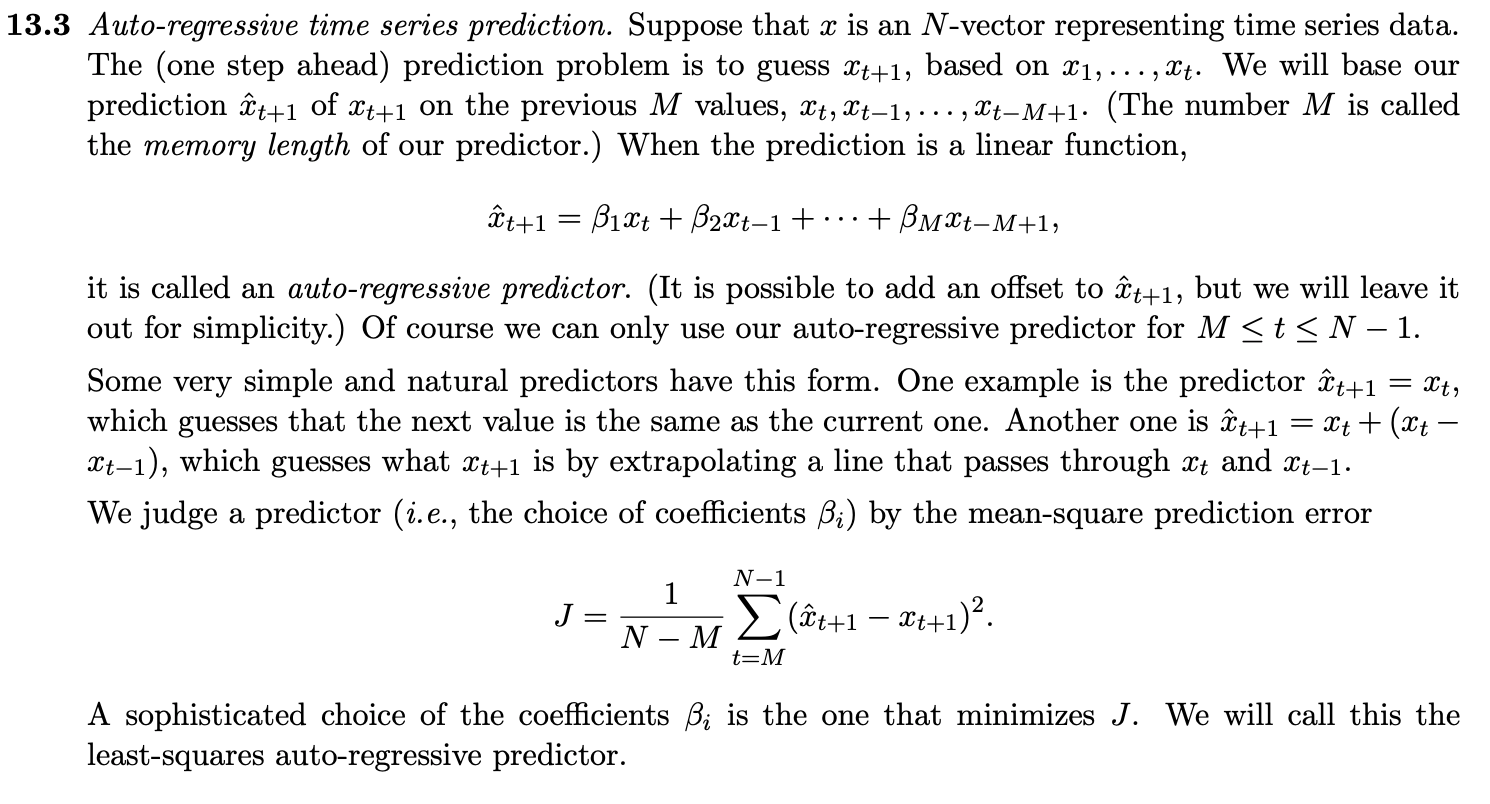

**(a)** Describe the **size** and **entries** of the matrix $A$ and the vector $b$ for which $J = \Vert A\beta - b\Vert^2 / (N-M)$.  This allows you to find the coefficients $\beta$ that minimize $J$, i.e. the auto-regressive predictor that minimizes the mean-square prediction error, simply by solving a standard least-square problem (`β = A \ b` in Julia).

**(b)** Implement an autoregressive model to predict German residential power demand with data from [this tutorial](https://vitalflux.com/autoregressive-ar-models-with-python-examples/#:~:text=Autoregressive%20models%20are%20based%20on,going%20up%20in%20the%20future.) via the code below.

* Fill in the `???` in the `autoregressive_model` to form `A, b` according to (a) for given data `x` and `M`.
* Apply it for `M=8` to find the prediction coefficients $\beta$ from "training" data consisting of the power-demand data excluding the last 100 days.
* Use the last 100 points as "test" data: compare the predictions of your fitted model by plotting the predictions for the last 100 days along with the actual data (fill in the ???).

### Sample Julia code:

In [1]:
# download the raw data (CSV file)
import Downloads
datafile = Downloads.download("https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv")

"/var/folders/q9/2vfl1wt51558xwpl4nv4wt580000gn/T/jl_bZCMPT/opsd_germany_daily.csv"

4384×5 Matrix{Any}:
 "Date"            "Consumption"     "Wind"    "Solar"     "Wind+Solar"
 "2006-01-01"  1069.18               ""        ""          ""
 "2006-01-02"  1380.52               ""        ""          ""
 "2006-01-03"  1442.53               ""        ""          ""
 "2006-01-04"  1457.22               ""        ""          ""
 "2006-01-05"  1477.13               ""        ""          ""
 "2006-01-06"  1403.43               ""        ""          ""
 "2006-01-07"  1300.29               ""        ""          ""
 "2006-01-08"  1207.98               ""        ""          ""
 "2006-01-09"  1529.32               ""        ""          ""
 "2006-01-10"  1576.91               ""        ""          ""
 "2006-01-11"  1577.18               ""        ""          ""
 "2006-01-12"  1553.28               ""        ""          ""
 ⋮                                                      
 "2017-12-20"  1559.69             90.88      8.799      99.679
 "2017-12-21"  1520.37            259.039  

summary(days) = "4383-element Vector{Int64}"
summary(consumption) = "4383-element Vector{Float64}"


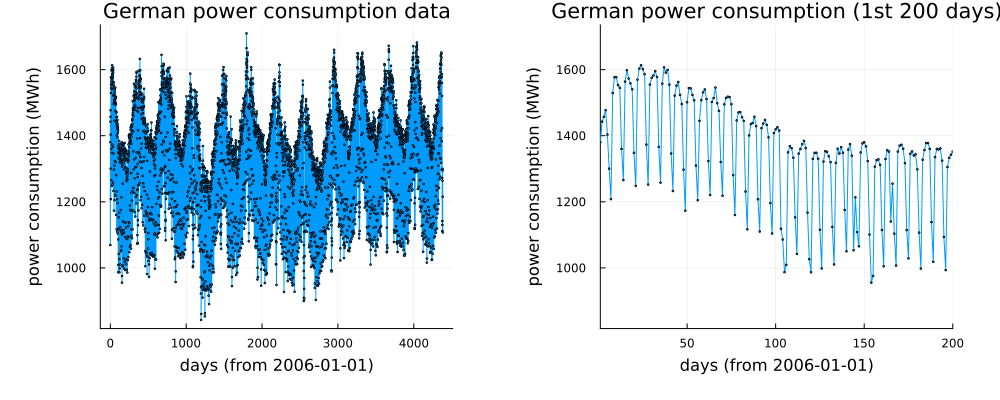

In [2]:
# extract the data and plot it:

using DelimitedFiles, Dates
data = readdlm(datafile, ',')
display(data)
dates = parse.(Date, data[2:end, 1])
days = Dates.value.(dates .- dates[1])
consumption = Float64.(data[2:end, 2])
@show summary(days)
@show summary(consumption)

using Plots
p1 = plot(days, consumption, markershape=:circle, markersize=1,
          xlabel="days (from 2006-01-01)", ylabel="power consumption (MWh)", legend=false,
          title="German power consumption data")
p2 = plot(days, consumption, markershape=:circle, markersize=1, xlim=(1,200),
          xlabel="days (from 2006-01-01)", ylabel="power consumption (MWh)", legend=false,
          title="German power consumption (1st 200 days)")
plot(p1, p2, size=(1000,400), left_margin = 10Plots.mm, bottom_margin = 10Plots.mm, right_margin = 10Plots.mm,)

In [ ]:
# fill in the ??? to get A and b from x and m
function autoregressive_model(x, M)
    N = length(x)
    A = similar(x, ???, ???) # ??? x ??? matrix of same type as x
    for i = 1:size(A,1) # fill in A row-by row
        t = M-1+i
        A[i,:] = x[???:???] # hint: each row of A comes from a slice of x
    end
    b = ???
    return A, b
end

training_data = consumption[1:end-100]

# construct your A and b from M=8 and find β
M = 8
A, b = autoregressive_model(training_data, M)
β = A \ b # least-square fit

In [ ]:
# test data from last 100+M points:
test_data = consumption[end-99-M:end]

# predictions for the last 100 points
predictions = ???

# plot the predictions for the last 100 points along with test data
using Plots
plot(predictions, linecolor=:red, markershape=:circle, markersize=1)
plot!(test_data[end-99:end], linecolor=:blue, markershape=:rect, markersize=1)

### Sample Python code:

In [1]:
import urllib.request
import tempfile

url = "https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv"

# Create a temporary file and download into it
with tempfile.NamedTemporaryFile(delete=False, suffix=".csv") as tmp_file:
    urllib.request.urlretrieve(url, tmp_file.name)
    datafile = tmp_file.name

days summary: {'min': 0, 'max': 4382, 'mean': 2191.0, 'std': 1265.2630819978376}
consumption summary: {'min': 842.395, 'max': 1709.5679999999998, 'mean': 1338.6758355897787, 'std': 165.7567979410516}


(1.0, 200.0)

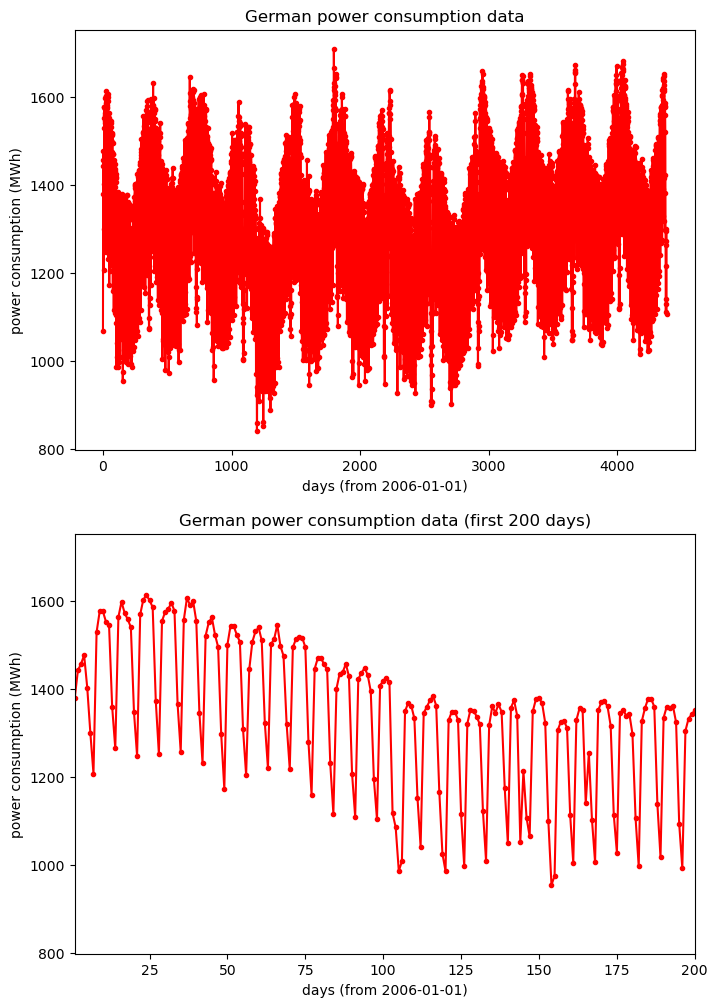

In [2]:
import numpy as np
from datetime import datetime

# Read CSV as strings (including header)
data = np.genfromtxt(datafile, delimiter=",", dtype=str)

# Skip header row (row 0)
data_no_header = data[1:]

# Parse dates (column 0)
dates = np.array([
    datetime.strptime(d, "%Y-%m-%d")
    for d in data_no_header[:, 0]
])

# Compute integer days since first date
days = np.array([(d - dates[0]).days for d in dates], dtype=int)

# Convert consumption column (column 1) to float64
consumption = data_no_header[:, 1].astype(np.float64)

print("days summary:", {
    "min": days.min(),
    "max": days.max(),
    "mean": days.mean(),
    "std": days.std()
})

print("consumption summary:", {
    "min": consumption.min(),
    "max": consumption.max(),
    "mean": consumption.mean(),
    "std": consumption.std()
})

import matplotlib.pyplot as plt

plt.figure(figsize=(8,12))
plt.subplot(2,1,1)
plt.title("German power consumption data")
plt.plot(days, consumption, "r.-")
plt.xlabel("days (from 2006-01-01)")
plt.ylabel("power consumption (MWh)")

plt.subplot(2,1,2)
plt.title("German power consumption data (first 200 days)")
plt.plot(days, consumption, "r.-")
plt.xlabel("days (from 2006-01-01)")
plt.ylabel("power consumption (MWh)")
plt.xlim(1,200)

In [ ]:
def autoregressive_model(x, M):
    x = np.asarray(x)
    N = len(x)

    # Allocate ??? x ??? matrix
    A = np.empty((???, ???), dtype=x.dtype)

    # Fill row-by-row (note 0-based Python indexing)
    for i in range(N - M):
        t = M - 1 + i
        A[i, :] = x[???:???]   # x[t], x[t-1], ..., x[t-M+1]

    # Target vector
    b = ???

    return A, b

# Training data:
training_data = consumption[:-100]

# construct your A and beta from M=8 and find β
M = 8
A, b = autoregressive_model(training_data, M)

# Least-squares fit (equivalent to Julia A \ b)
beta, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)

print("beta =", beta)

In [ ]:
# test data from last 100+M points
test_data = consumption[-(100 + M):]

predictions = ???

plt.figure()
plt.plot(predictions, 'ro-', label="predictions")
plt.plot(test_data[-100:], 'b*-', label="test data")